# Анализ сервиса для чтения ĸниг по подписĸе

# Оглавление
1. [Описание проекта и данных](#description)
2. [Открытие данных и исследование таблиц](#start)
3. [Анализ данных](#analysis)
4. [Общие выводы](#summary)

## Описание проекта и данных <a class="anchor" id="description"></a>

Коронавирус застал мир врасплох, изменив привычный порядок вещей. В свободное время жители городов больше не выходят на улицу, не посещают кафе и торговые центры. Зато стало больше времени для книг. Это заметили стартаперы — и бросились создавать приложения для тех, кто любит читать. Исследуемая компания решила быть на волне и купила крупный сервис для чтения книг по подписке. 

**Основная задача** — проанализировать базу данных. В ней — информация о книгах, издательствах, авторах, а также пользовательские обзоры книг. Эти данные помогут сформулировать ценностное предложение для нового продукта.

**Для работы нам доступно пять таблиц:**

1) Таблица `books` содержит данные о книгах:

- `book_id` — идентификатор книги;

- `author_id` — идентификатор автора;

- `title` — название книги;

- `num_pages` — количество страниц;

- `publication_date` — дата публикации книги;

- `publisher_id` — идентификатор издателя.

2) Таблица `authors` содержит данные об авторах:

- `author_id` — идентификатор автора;

- `author` — имя автора.

3) Таблица `publishers` содержит данные об издательствах:

- `publisher_id` — идентификатор издательства;

- `publisher` — название издательства;

4) Таблица `ratings` содержит данные о пользовательских оценках книг:

- `rating_id` — идентификатор оценки;

- `book_id` — идентификатор книги;

- `username` — имя пользователя, оставившего оценку;

- `rating` — оценка книги.

5) Таблица `reviews` содержит данные о пользовательских обзорах на книги:

- `review_id` — идентификатор обзора;

- `book_id` — идентификатор книги;

- `username` — имя пользователя, написавшего обзор;

- `text` — текст обзора.

**Схема**:
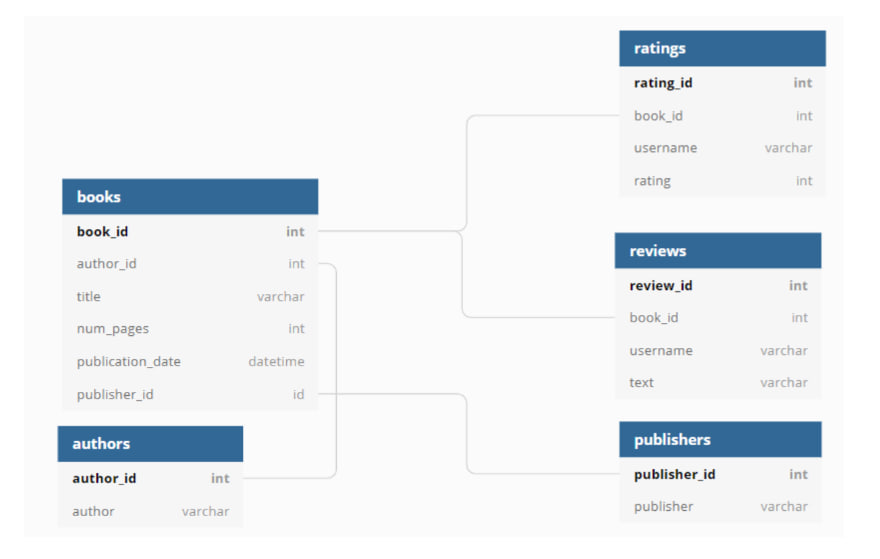

**Задания:**
- Посчитайте, сколько книг вышло после 1 января 2000 года;
- Для каждой книги посчитайте количество обзоров и среднюю оценку;
- Определите издательство, которое выпустило наибольшее число книг толще 50 страниц — так вы исключите из анализа брошюры;
- Определите автора с самой высокой средней оценкой книг — учитывайте только книги с 50 и более оценками;
- Посчитайте среднее количество обзоров от пользователей, которые поставили больше 48 оценок.


## Открытие данных и исследование таблиц <a class="anchor" id="start"></a>

Для начала импортируем бибилотеки:

In [1]:
import pandas as pd
import sqlalchemy as sa
#импортируем библиотеки

Теперь выведем первые 5 строк каждой таблицы:

In [3]:
books = '''SELECT * FROM books LIMIT 5'''
authors = '''SELECT * FROM authors LIMIT 5'''
publishers = '''SELECT * FROM publishers LIMIT 5'''
ratings = '''SELECT * FROM ratings LIMIT 5'''
reviews = '''SELECT * FROM reviews LIMIT 5'''

display(get_sql_data(books))
display(get_sql_data(authors))
display(get_sql_data(publishers))
display(get_sql_data(ratings))
get_sql_data(reviews)

,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope...,322,2010-12-21,135
3,4,82,1491: New Revelations of the Americas Before C...,541,2006-10-10,309
4,5,125,1776,386,2006-07-04,268


,author_id,author
0,1,A.S. Byatt
1,2,Aesop/Laura Harris/Laura Gibbs
2,3,Agatha Christie
3,4,Alan Brennert
4,5,Alan Moore/David Lloyd


,publisher_id,publisher
0,1,Ace
1,2,Ace Book
2,3,Ace Books
3,4,Ace Hardcover
4,5,Addison Wesley Publishing Company


,rating_id,book_id,username,rating
0,1,1,ryanfranco,4
1,2,1,grantpatricia,2
2,3,1,brandtandrea,5
3,4,2,lorichen,3
4,5,2,mariokeller,2


,review_id,book_id,username,text
0,1,1,brandtandrea,Mention society tell send professor analysis. ...
1,2,1,ryanfranco,Foot glass pretty audience hit themselves. Amo...
2,3,2,lorichen,Listen treat keep worry. Miss husband tax but ...
3,4,3,johnsonamanda,Finally month interesting blue could nature cu...
4,5,3,scotttamara,Nation purpose heavy give wait song will. List...


А теперь посчитаем количество строк в каждой таблице:

In [4]:
books_cnt = '''SELECT count(*) as books_cnt
            FROM books'''
authors_cnt = '''SELECT count(*) as authors_cnt 
            FROM authors'''
publishers_cnt = '''SELECT count(*) as publishers_cnt
            FROM publishers '''
ratings_cnt = '''SELECT count(*) as ratings_cnt
            FROM ratings'''
reviews_cnt = '''SELECT count(*) as reviews_cnt 
            FROM reviews'''

display(get_sql_data(books_cnt))
display(get_sql_data(authors_cnt))
display(get_sql_data(publishers_cnt))
display(get_sql_data(ratings_cnt))
get_sql_data(reviews_cnt)

,books_cnt
0,1000


,authors_cnt
0,636


,publishers_cnt
0,340


,ratings_cnt
0,6456


,reviews_cnt
0,2793


**Вывод:** Данные из таблиц соответсвуют описанию. Количество строк в каждой таблице: 
- books - 1000 строк
- authors - 636 строк
- publishers - 340 строк
- ratings - 6456 строк
- reviews - 2793 строк

## Анализ данных <a class="anchor" id="analysis"></a>
Теперь можем выполнить задания, указанные ранее:

### Посчитайте, сколько книг вышло после 1 января 2000 года

In [5]:
books_cnt_after_2000 = '''SELECT count(*) as books_cnt
            FROM books
            WHERE publication_date > '2000-01-01' '''
get_sql_data(books_cnt_after_2000)

,books_cnt
0,819


**Вывод:** Количество данных о книгах после 2000 года составляет 819 штук, а это значит, что всего 181 книг выпущено в прошлом веке и 1 января 2000 года.

### Для каждой книги посчитайте количество обзоров и среднюю оценку

In [6]:
books_rr = '''SELECT b.book_id,
                    b.title as book_name,
                    round(avg(ra.rating)) as rating_avg,
                    count(distinct re.review_id) as review_cnt
            FROM books as b
            left join ratings as ra on ra.book_id = b.book_id
            left join reviews as re on re.book_id = b.book_id
            GROUP BY b.book_id, b.title '''
get_sql_data(books_rr)

,book_id,book_name,rating_avg,review_cnt
0,1,'Salem's Lot,4.0,2
1,2,1 000 Places to See Before You Die,3.0,1
2,3,13 Little Blue Envelopes (Little Blue Envelope...,5.0,3
3,4,1491: New Revelations of the Americas Before C...,5.0,2
4,5,1776,4.0,4
...,...,...,...,...
995,996,Wyrd Sisters (Discworld #6; Witches #2),4.0,3
996,997,Xenocide (Ender's Saga #3),3.0,3
997,998,Year of Wonders,3.0,4
998,999,You Suck (A Love Story #2),5.0,2


Чтобы понимать значения рейтинга, посмотрим по какой шкале он рассматривается:

In [7]:
rating_diff = '''SELECT max(rating) as rating_max,
                       min(rating) as rating_min
            FROM ratings'''
get_sql_data(rating_diff)

,rating_max,rating_min
0,5,1


А так же количество рецензий на одну книгу, и проверим правильно ли мы соединили таблицы (если сумма в столбце review_cnt будет равна количеству строк в таблице reviews, а именно 2793 штукам, то значит все верно):

In [8]:
review_diff = '''SELECT max(review_cnt) as review_cnt_max,
                       min(review_cnt) as review_cnt_min,
                       sum(review_cnt) as check
                FROM (SELECT b.book_id,
                    b.title as book_name,
                    round(avg(ra.rating)) as rating_avg,
                    count(distinct re.review_id) as review_cnt
            FROM books as b
            left join ratings as ra on ra.book_id = b.book_id
            left join reviews as re on re.book_id = b.book_id
            GROUP BY b.book_id, b.title) as books_rr'''
get_sql_data(review_diff)

,review_cnt_max,review_cnt_min,check
0,7,0,2793.0


**Вывод:** Рейтинг каждой книги выставляется по пятибалльной шкале, количество обзоров на одну книгу может колебаться от 0 до 7. В итоговой таблице указан идентификатор книги, ее название, округленный в большую сторону средний рейтинг книги и подчситано количество обзоров.

### Определите издательство, которое выпустило наибольшее число книг толще 50 страниц

In [9]:
top_publisher = '''SELECT p.publisher_id,
                      p.publisher,
                      count(b.book_id) as book_cnt
               FROM publishers as p
               join books as b on b.publisher_id = p.publisher_id
               WHERE b.num_pages > 50
               GROUP BY p.publisher_id, p.publisher
               ORDER BY book_cnt desc
               LIMIT 1'''

get_sql_data(top_publisher)

,publisher_id,publisher,book_cnt
0,212,Penguin Books,42


**Вывод:** Издатель, который выпустил 42 книги толще 50 страниц - Penguin Books.

### Определите автора с самой высокой средней оценкой книг (только книги с 50 и более оценками)

Разделим эту задачи на подзадачи, выясним сначала авторов, у которых у книг более 50 оценок:

In [10]:
books_50 = '''SELECT a.author_id,
                            a.author,
                            b.book_id,
                            count(ra.rating) as rating_cnt,
                            avg(ra.rating) as rating_avg
                    FROM authors as a
                    left join books as b on a.author_id = b.author_id
                    left join ratings as ra on ra.book_id = b.book_id
                    GROUP BY a.author_id, a.author, b.book_id
                    HAVING count(ra.rating)>= 50 '''
get_sql_data(books_50)

,author_id,author,book_id,rating_cnt,rating_avg
0,235,J.D. Salinger,673,86,3.825581
1,554,Stephenie Meyer,948,160,3.662500
2,469,Paulo Coelho/Alan R. Clarke/Özdemir İnce,627,57,3.789474
3,106,Dan Brown,75,84,3.678571
4,376,Louisa May Alcott,399,52,4.192308
5,240,J.R.R. Tolkien,750,88,4.125000
6,311,John Steinbeck,488,61,3.622951
7,236,J.K. Rowling/Mary GrandPré,300,73,4.246575
8,240,J.R.R. Tolkien,722,74,4.391892
9,498,Rick Riordan,779,62,4.080645


Теперь сделаем это подзапросом и выделим автора, у кого средний рейтинг больше всех. Так же дополнительно выведем количество оценок и количество книг:

In [11]:
top_author = '''SELECT books_50.author_id,
                      books_50.author,
                      count(books_50.rating_avg) as books_cnt,
                      sum(books_50.rating_cnt) as rating_cnt,
                      avg(books_50.rating_avg) as rating_avg
               FROM (SELECT a.author_id,
                            a.author,
                            b.book_id,
                            count(ra.rating) as rating_cnt,
                            avg(ra.rating) as rating_avg
                    FROM authors as a
                    left join books as b on a.author_id = b.author_id
                    left join ratings as ra on ra.book_id = b.book_id
                    GROUP BY a.author_id, a.author, b.book_id
                    HAVING count(ra.rating)>= 50) as books_50
                                     
               GROUP BY books_50.author_id, books_50.author
               ORDER BY rating_avg desc
               LIMIT 1'''

get_sql_data(top_author)

,author_id,author,books_cnt,rating_cnt,rating_avg
0,236,J.K. Rowling/Mary GrandPré,4,310.0,4.283844


**Вывод:** Самый большой средний рейтинг у автора среди книг с 50 и более оценками у J.K. Rowling/Mary GrandPré, у которой есть 4 книги, которые суммарно получили 310 оценок. 

### Посчитайте среднее количество обзоров от пользователей, которые поставили больше 48 оценок

Снова разделим задачу на подзадачи и выясним, какие пользователи ставили больше 48 оценок и выведем количество для проверки:

In [12]:
scores_48 = '''SELECT username,
                      count(rating)
               FROM ratings
               GROUP BY username
               HAVING count(rating) > 48'''

get_sql_data(scores_48)

,username,count
0,walter49,49
1,sfitzgerald,55
2,jennifermiller,53
3,andreaeaton,49
4,xdavis,51
5,vcarter,49
6,paul88,56
7,lesliegibbs,50
8,susan85,49
9,martinadam,56


Добавим этих пользователей в условие, предварительно убрав столбец с просчетом, чтобы подчитать количество обзоров:

In [13]:
cnt_reviews = '''SELECT username,
                        count(review_id) as reviews_cnt
                FROM reviews
                WHERE username in (SELECT username
                                   FROM ratings
                                   GROUP BY username
                                   HAVING count(rating) > 48)
                GROUP BY username
                '''
get_sql_data(cnt_reviews)

,username,reviews_cnt
0,walter49,23
1,sfitzgerald,28
2,jennifermiller,25
3,andreaeaton,22
4,xdavis,18
5,vcarter,20
6,paul88,22
7,lesliegibbs,26
8,susan85,29
9,martinadam,27


Осталось подсчитать среднее от полученного результата:

In [14]:
avg_reviews = '''SELECT avg(cnt_reviews.reviews_cnt) as avg_review
                 FROM (SELECT username,
                              count(review_id) as reviews_cnt
                       FROM reviews
                       WHERE username in (SELECT username
                                          FROM ratings
                                          GROUP BY username
                                          HAVING count(rating) > 48)
                       GROUP BY username) as cnt_reviews
                '''
get_sql_data(avg_reviews)

,avg_review
0,24.0


**Вывод:** Пользователи, поставившие более 48 оценок, в среднем написали 24 обзора.

## Общие выводы

**Основной задачей** было проанализировать базу данных. В ней — информация о книгах, издательствах, авторах, а также пользовательские обзоры книг, состоящие из 5 таблиц.

В начале были изучены данные из таблиц и в процессе стало понятно, что данные из таблиц соответсвуют описанию. Количество строк в каждой таблице: 
- `books` - 1000 строк
- `authors` - 636 строк
- `publishers` - 340 строк
- `ratings` - 6456 строк
- `reviews` - 2793 строк

Для решения основной задачи нужно было решить следующие задачи:
> Посчитать, сколько книг вышло после 1 января 2000 года;

Количество данных о книгах после 2000 года составляет 819 штук, а это значит, что всего 181 книг выпущено в прошлом веке и 1 января 2000 года.

> Для каждой книги посчитать количество обзоров и среднюю оценку;

Рейтинг каждой книги выставляется по пятибалльной шкале, количество обзоров на одну книгу может колебаться от 0 до 7. В итоговой таблице указан идентификатор книги, ее название, округленный в большую сторону средний рейтинг книги и подчситано количество обзоров.

> Определить издательство, которое выпустило наибольшее число книг толще 50 страниц;

Издатель, который выпустил 42 книги толще 50 страниц - Penguin Books.

> Определить автора с самой высокой средней оценкой книг, учитывая только книги с 50 и более оценками;

Самый большой средний рейтинг у автора среди книг с 50 и более оценками у J.K. Rowling/Mary GrandPré, у которой есть 4 книги, которые суммарно получили 310 оценок.
 
> Посчитать среднее количество обзоров от пользователей, которые поставили больше 48 оценок.

Пользователи, поставившие более 48 оценок, в среднем написали 24 обзора.